In [1]:
# Imports 
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten 
from keras.layers.convolutional import Conv2D
from keras.layers import MaxPooling2D
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU


Using TensorFlow backend.


In [2]:
# read data sets
train_data = pd.read_csv('data/train.csv', sep=',', header=0)
test_data = pd.read_csv('data/test.csv', sep=',', header=0) 

In [4]:
# Reshape, normalize train and test data for CNN (28 x 28 images)

train_label = (train_data.iloc[:, 0]).values
train = (train_data.iloc[:, 1:]).values
test = test_data
# print(np.max(train, axis = 0))

n_samples = np.shape(train)[0]
n_test = np.shape(test)[0]

train = train.reshape(n_samples, 28, 28, 1 )
test = test.values.reshape(n_test, 28, 28, 1)

# Normalize
train = train/ 255
test = test/ 255

# split the train set into train and validation set
train,valid,train_label,valid_label = train_test_split(train, train_label, test_size=0.119047, random_state=13)


In [14]:
#  Check data shape

print(np.shape(train))
print(np.shape(train_label))
print(np.shape(valid))
print(np.shape(valid_label))

(37000, 28, 28, 1)
(37000, 10)
(5000, 28, 28, 1)
(5000, 10)


In [16]:
# initialize training variables

batch_size = 64
epochs = 20
num_classes = 10

In [7]:
# Initialize and compile the CNN model (without dropout)

model = Sequential()
train_label = to_categorical(train_label)

model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(32, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


In [9]:
# check mmodel parameters at each layer
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          18496     
__________

In [10]:
# One-hot for validation labels
valid_label = to_categorical(valid_label)

# Train the model
lossF = model.fit(train, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid, valid_label))

Instructions for updating:
Use tf.cast instead.
Train on 37000 samples, validate on 5000 samples
Epoch 1/20
37000/37000 [==============================] - 70s 2ms/step - loss: 0.2340 - acc: 0.9274 - val_loss: 0.0649 - val_acc: 0.9792
Epoch 2/20
37000/37000 [==============================] - 70s 2ms/step - loss: 0.0559 - acc: 0.9818 - val_loss: 0.0559 - val_acc: 0.9828
Epoch 3/20
37000/37000 [==============================] - 65s 2ms/step - loss: 0.0395 - acc: 0.9877 - val_loss: 0.0491 - val_acc: 0.9862
Epoch 4/20
37000/37000 [==============================] - 65s 2ms/step - loss: 0.0297 - acc: 0.9911 - val_loss: 0.0476 - val_acc: 0.9872
Epoch 5/20
37000/37000 [==============================] - 67s 2ms/step - loss: 0.0219 - acc: 0.9926 - val_loss: 0.0735 - val_acc: 0.9792
Epoch 6/20
37000/37000 [==============================] - 65s 2ms/step - loss: 0.0177 - acc: 0.9941 - val_loss: 0.0517 - val_acc: 0.9876
Epoch 7/20
37000/37000 [==============================] - 70s 2ms/step - loss: 0.

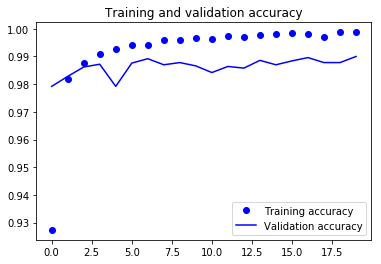

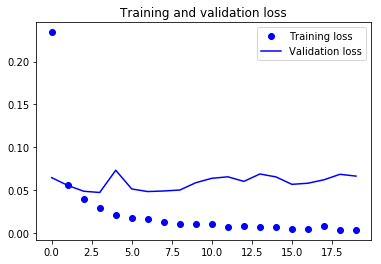

In [19]:
# Plot training,validation accuracy & loss functions

accuracy = lossF.history['acc']
val_accuracy = lossF.history['val_acc']
loss = lossF.history['loss']
val_loss = lossF.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [42]:
# predict the test classes
predCl = model.predict_classes(test)

In [57]:
#  Write the result to a CSV submission file

j=1
with open("data/result.csv", "w+") as f:
    f.write('ImageId,Label')
    f.write('\n')
    for i in predCl:
        f.write(''+ (str)(j) + ',' + (str)(i))
        j+=1
        f.write('\n')